In [1]:
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#load dataset
data=pd.read_csv('/kaggle/input/laptops-price-dataset/laptops.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [5]:
data.head(5)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [6]:
print(data.isnull().sum())

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64


In [7]:
#fill missing value
data['GPU'].fillna(method='Bfill', inplace=True)
data['Screen'].fillna(method='Bfill', inplace=True)
data['Storage type'].fillna(method='Bfill', inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2160 non-null   object 
 8   GPU           2158 non-null   object 
 9   Screen        2160 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [9]:
data['Final Price'] = data['Final Price'].astype(int)
data['Screen'] = data['Screen'].astype(int)

In [10]:
data.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2160.000000,2160.000000
mean,15.413889,596.294444,14.815741,1312.380093
std,9.867815,361.220506,1.164287,911.506976
min,4.000000,0.000000,10.000000,201.000000
25%,8.000000,256.000000,14.000000,661.000000
50%,16.000000,512.000000,15.000000,1031.500000
75%,16.000000,1000.000000,15.000000,1708.250000
max,128.000000,4000.000000,18.000000,7150.000000


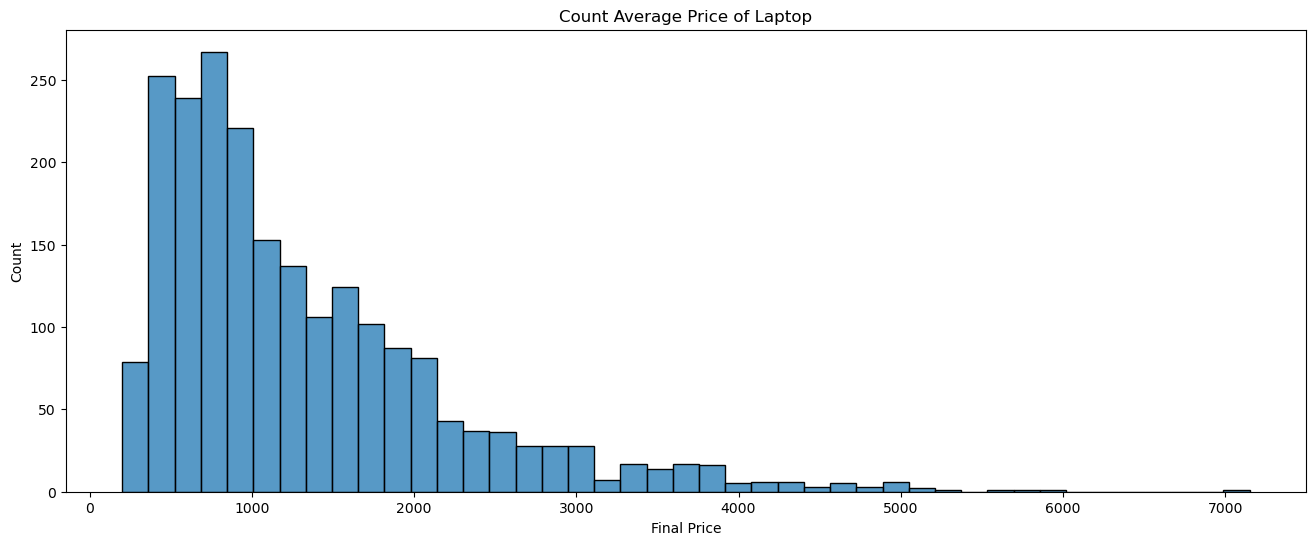

In [11]:
plt.figure(figsize=(16,6))
sns.histplot(data['Final Price'],kde=False)
plt.title('Count Average Price of Laptop')
plt.show()

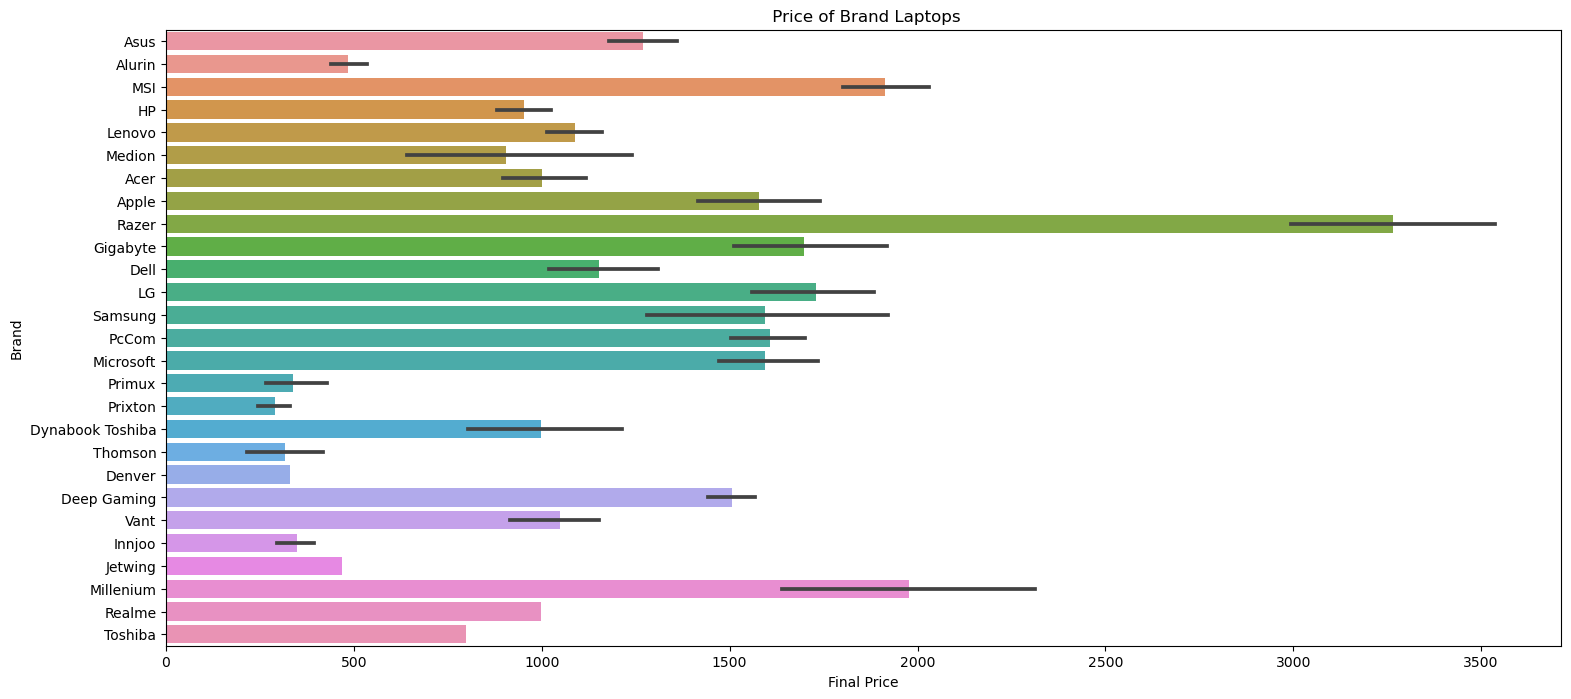

In [12]:
plt.figure(figsize=(18,8))
sns.barplot(x="Final Price", y="Brand", data=data)
plt.title(" Price of Brand Laptops")
plt.show()

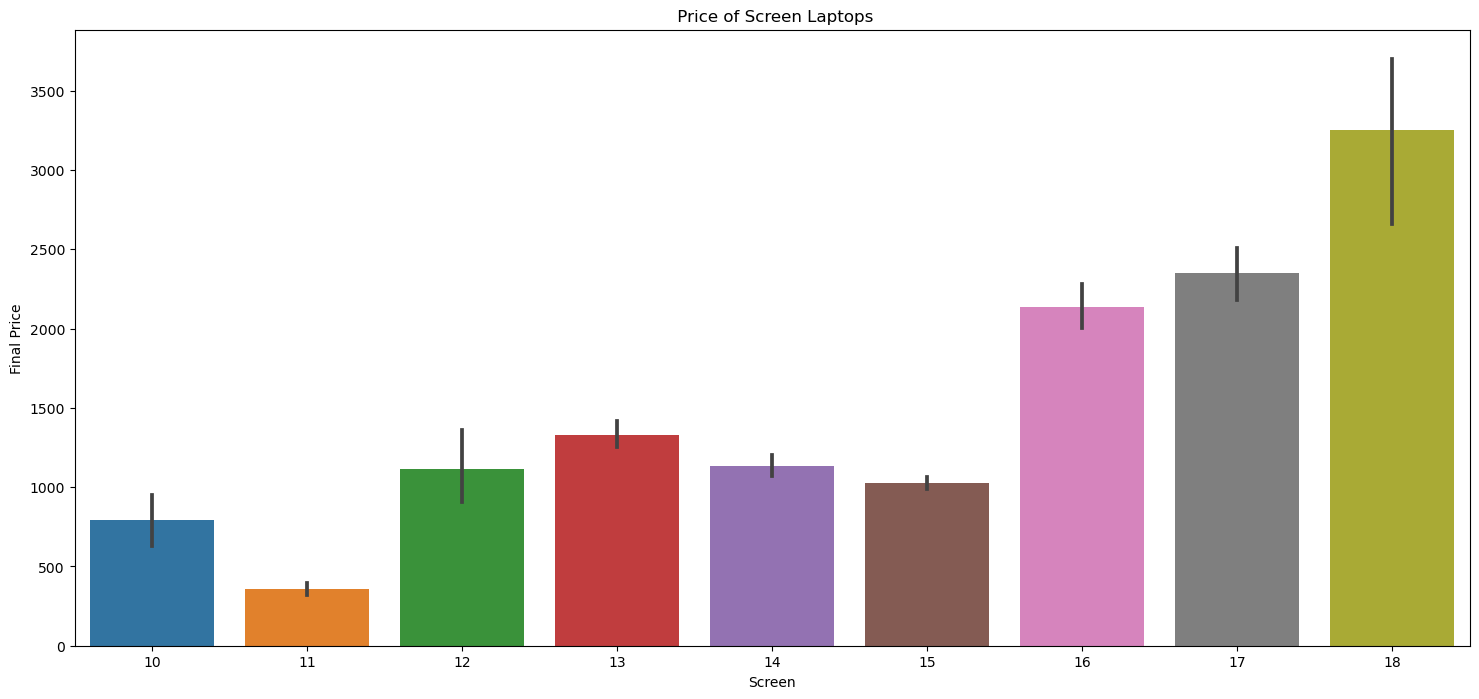

In [13]:
plt.figure(figsize=(18,8))
sns.barplot(x="Screen", y="Final Price", data=data)
plt.title(" Price of Screen Laptops")
plt.show()

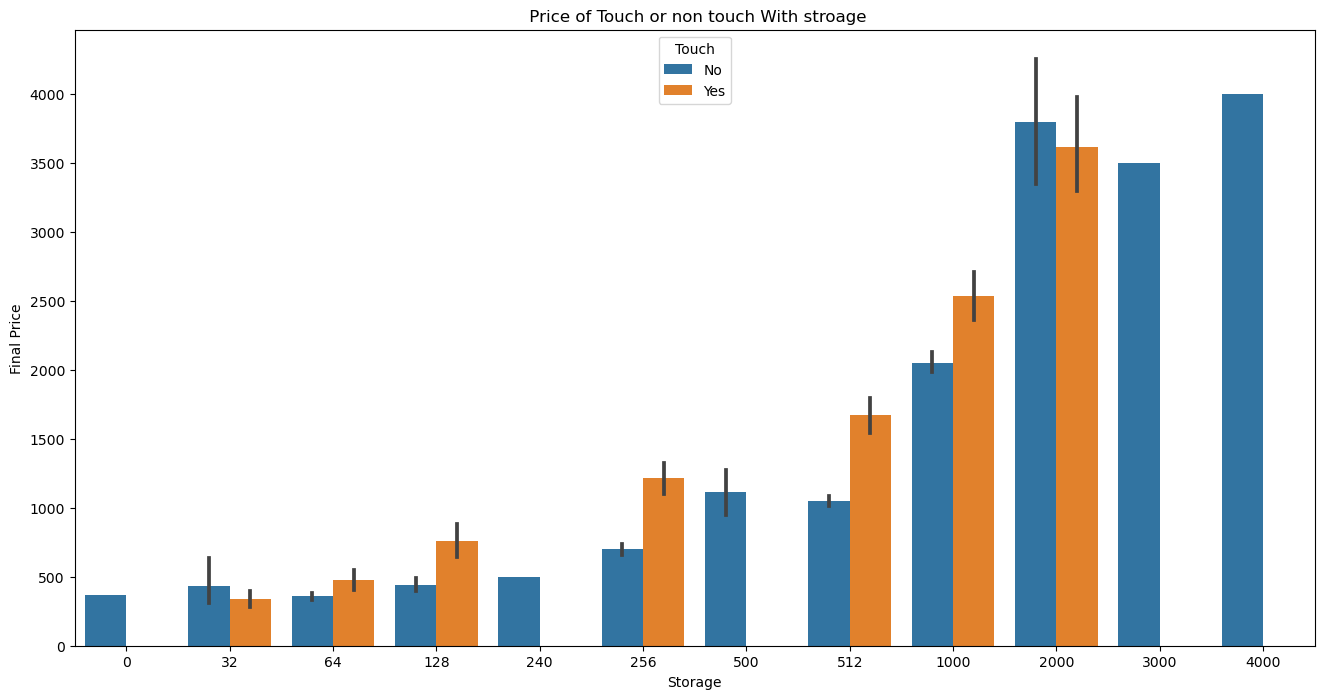

In [14]:
plt.figure(figsize=(16,8))
sns.barplot(x="Storage", y="Final Price", hue="Touch", data=data)
plt.title(" Price of Touch or non touch With stroage")
plt.show()

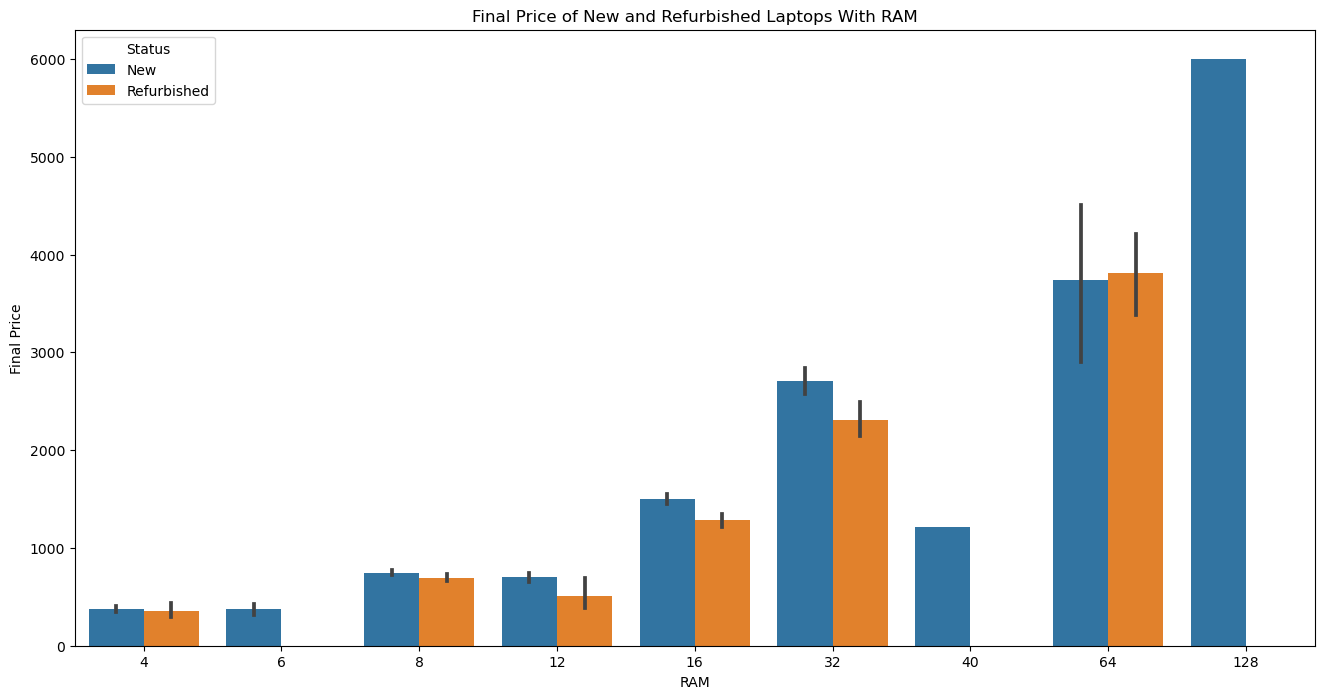

In [15]:
plt.figure(figsize=(16,8))
sns.barplot(x="RAM", y="Final Price", hue="Status", data=data)
plt.title("Final Price of New and Refurbished Laptops With RAM")
plt.show()

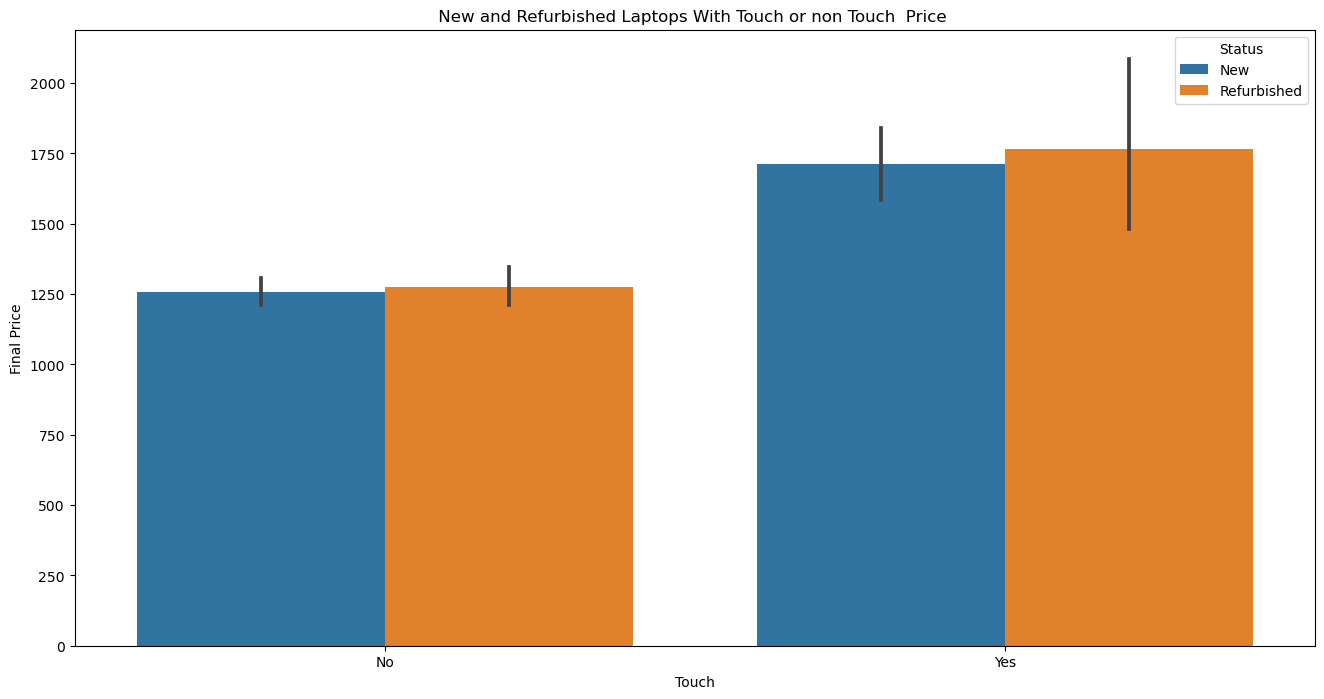

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(x="Touch", y="Final Price", hue='Status', data=data)
plt.title(" New and Refurbished Laptops With Touch or non Touch  Price  ")
plt.show()

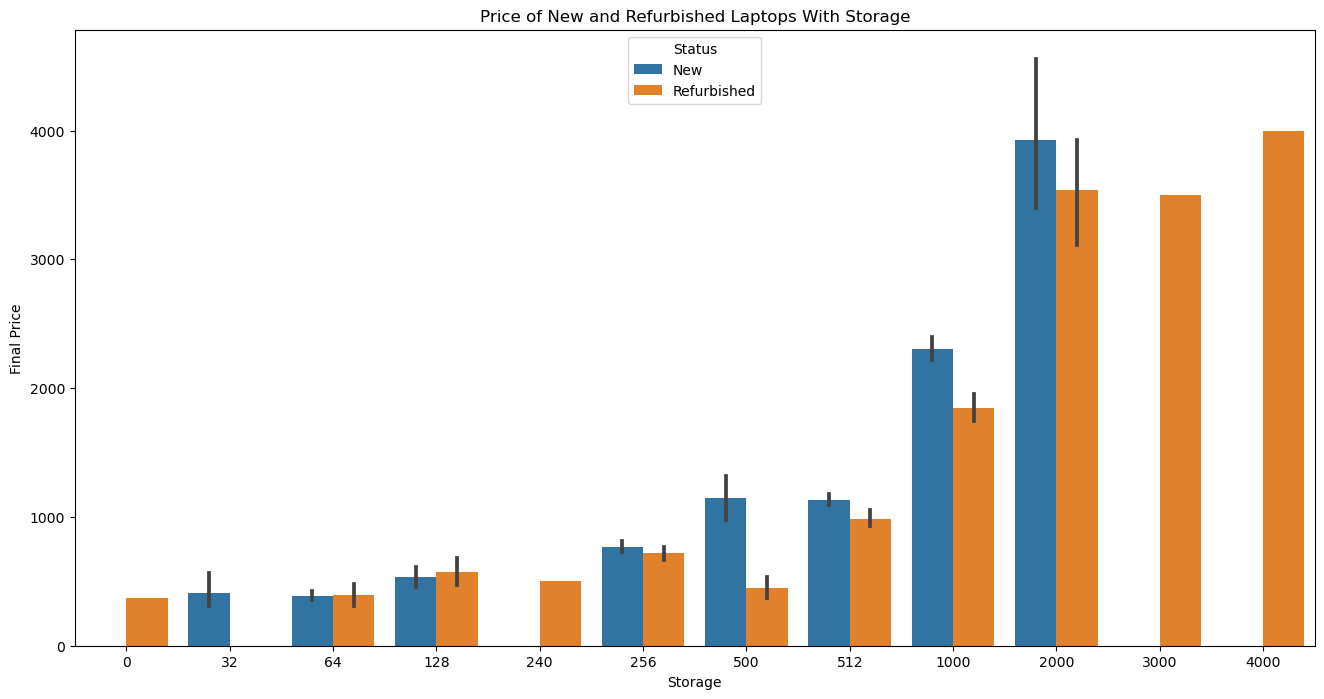

In [17]:
plt.figure(figsize=(16,8))
sns.barplot(x="Storage", y="Final Price", hue="Status", data=data)
plt.title("Price of New and Refurbished Laptops With Storage")
plt.show()

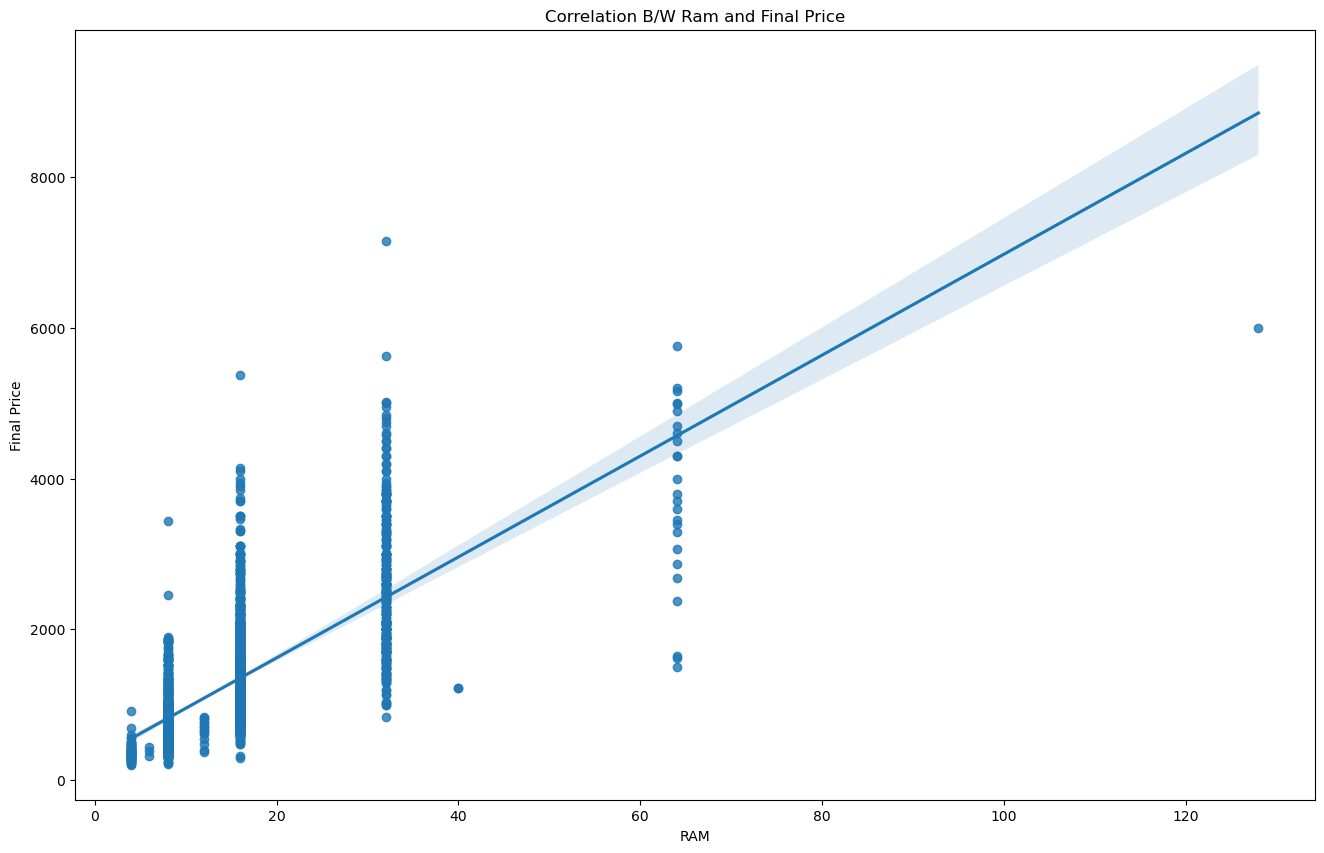

In [18]:
plt.subplots(figsize=(16, 10))
sns.regplot(x="RAM",y="Final Price",data=data)
plt.title('Correlation B/W Ram and Final Price')
plt.show()

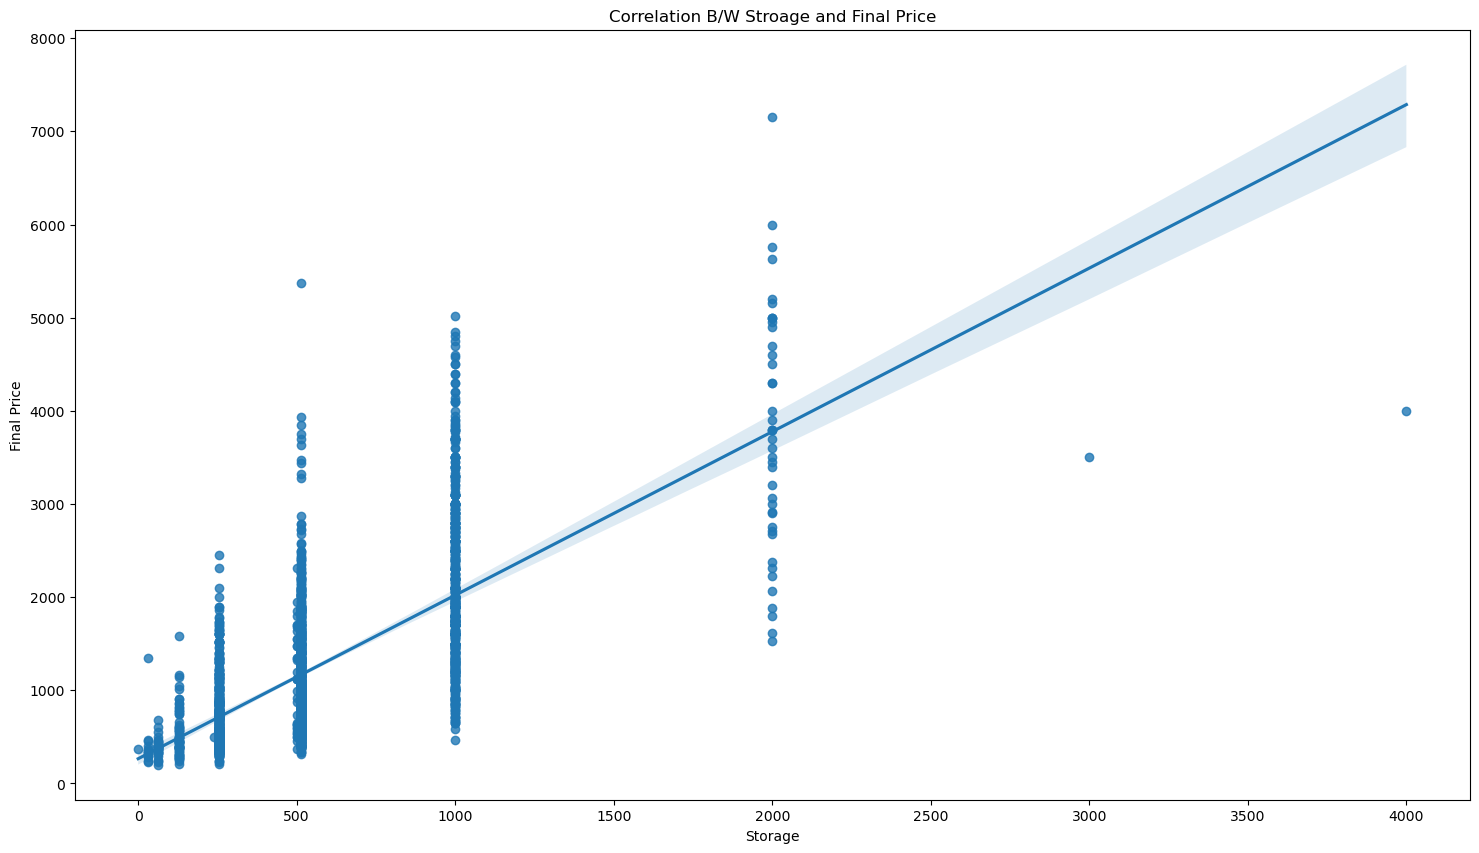

In [19]:
plt.subplots(figsize=(18, 10))
sns.regplot(x="Storage",y="Final Price",data=data)
plt.title('Correlation B/W Stroage and Final Price')
plt.show()

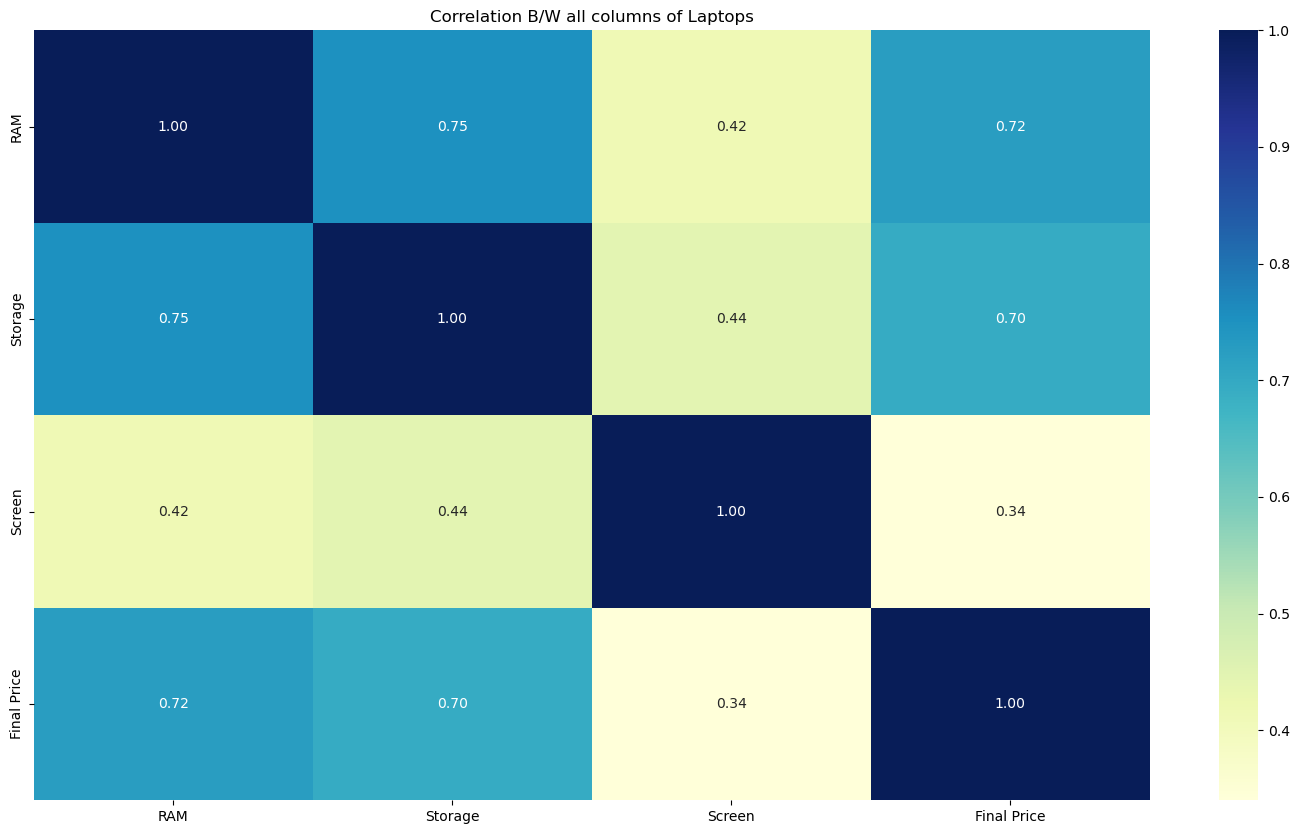

In [20]:
plt.subplots(figsize=(18, 10))
sns.heatmap(data.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.title('Correlation B/W all columns of Laptops')
plt.show()